<a href="https://colab.research.google.com/github/harsh-csbs-2020-cit/Analysis-of-Crime-Against-Women/blob/main/CRIME_AGAINST_WOMEN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# VISUALIZATION AND PREDICTION OF CRIME AGAINST WOMEN


In [ ]:
!pip install pandas --upgrade
!pip install matplotlib
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 31.7 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Importing data

In [ ]:
from google.colab import files
 
 
uploaded = files.upload()

Saving crimes_against_women_2001-2014.csv to crimes_against_women_2001-2014.csv


Data Preparation and Cleaning

In [ ]:
crimes_df = pd.read_csv('crimes_against_women_2001-2014.csv')
type(crimes_df)

pandas.core.frame.DataFrame

In [ ]:
crimes_df

,Unnamed: 0,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...,...,...
10672,832,Lakshadweep,Lakshadweep,2014,1,0,0,1,2,0,0
10673,833,Lakshadweep,Total District(s),2014,1,0,0,1,2,0,0
10674,834,Puducherry,Karaikal,2014,3,1,0,12,1,1,0
10675,835,Puducherry,Puducherry,2014,7,6,1,20,7,3,0


In [ ]:
crimes_df.shape

(10677, 11)

Data Preparation and Cleaning

Null or missing values

In [ ]:
overall_crime = crimes_df.isna().sum()
overall_crime

Unnamed: 0                                             0
STATE/UT                                               0
DISTRICT                                               0
Year                                                   0
Rape                                                   0
Kidnapping and Abduction                               0
Dowry Deaths                                           0
Assault on women with intent to outrage her modesty    0
Insult to modesty of Women                             0
Cruelty by Husband or his Relatives                    0
Importation of Girls                                   0
dtype: int64

Total number of unique districts

In [ ]:
districts = len(crimes_df.DISTRICT.unique())
districts

1605

Drop the district columns 'DISTRICT' and 'UNNAMED: 0'

In [ ]:
crimes_df.drop(['DISTRICT','Unnamed: 0'], axis = 1 , inplace = True)
crimes_df

,STATE/UT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,ANDHRA PRADESH,2001,50,30,16,149,34,175,0
1,ANDHRA PRADESH,2001,23,30,7,118,24,154,0
2,ANDHRA PRADESH,2001,27,34,14,112,83,186,0
3,ANDHRA PRADESH,2001,20,20,17,126,38,57,0
4,ANDHRA PRADESH,2001,23,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...
10672,Lakshadweep,2014,1,0,0,1,2,0,0
10673,Lakshadweep,2014,1,0,0,1,2,0,0
10674,Puducherry,2014,3,1,0,12,1,1,0
10675,Puducherry,2014,7,6,1,20,7,3,0


In [ ]:
crimes_df.rename( columns = {'Kidnapping and Abduction':'Kidnapping_Abduction','Dowry Deaths':'Dowry_Deaths',
                             'Assault on women with intent to outrage her modesty':'Hurting_of_womens_modesty',
                             'Insult to modesty of Women':'Insult_to_womens_modesty',
                             'Cruelty by Husband or his Relatives':'Domestic_Cruelty',
                             'Importation of Girls':'Importation_of_Girls'}, inplace = True)
crimes_df

,STATE/UT,Year,Rape,Kidnapping_Abduction,Dowry_Deaths,Hurting_of_womens_modesty,Insult_to_womens_modesty,Domestic_Cruelty,Importation_of_Girls
0,ANDHRA PRADESH,2001,50,30,16,149,34,175,0
1,ANDHRA PRADESH,2001,23,30,7,118,24,154,0
2,ANDHRA PRADESH,2001,27,34,14,112,83,186,0
3,ANDHRA PRADESH,2001,20,20,17,126,38,57,0
4,ANDHRA PRADESH,2001,23,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...
10672,Lakshadweep,2014,1,0,0,1,2,0,0
10673,Lakshadweep,2014,1,0,0,1,2,0,0
10674,Puducherry,2014,3,1,0,12,1,1,0
10675,Puducherry,2014,7,6,1,20,7,3,0


Remove all trhe repeated upper-case values

In [ ]:
print(crimes_df['STATE/UT'].unique())

['ANDHRA PRADESH' 'ARUNACHAL PRADESH' 'ASSAM' 'BIHAR' 'CHHATTISGARH' 'GOA'
 'GUJARAT' 'HARYANA' 'HIMACHAL PRADESH' 'JAMMU & KASHMIR' 'JHARKHAND'
 'KARNATAKA' 'KERALA' 'MADHYA PRADESH' 'MAHARASHTRA' 'MANIPUR' 'MEGHALAYA'
 'MIZORAM' 'NAGALAND' 'ODISHA' 'PUNJAB' 'RAJASTHAN' 'SIKKIM' 'TAMIL NADU'
 'TRIPURA' 'UTTAR PRADESH' 'UTTARAKHAND' 'WEST BENGAL' 'A & N ISLANDS'
 'CHANDIGARH' 'D & N HAVELI' 'DAMAN & DIU' 'DELHI' 'LAKSHADWEEP'
 'PUDUCHERRY' 'Andhra Pradesh' 'Arunachal Pradesh' 'Assam' 'Bihar'
 'Chhattisgarh' 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh'
 'Jammu & Kashmir' 'Jharkhand' 'Karnataka' 'Kerala' 'Madhya Pradesh'
 'Maharashtra' 'Manipur' 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha'
 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Tripura' 'Uttar Pradesh'
 'Uttarakhand' 'West Bengal' 'A&N Islands' 'Chandigarh' 'D&N Haveli'
 'Daman & Diu' 'Delhi UT' 'Lakshadweep' 'Puducherry' 'Telangana'
 'A & N Islands']


In [ ]:
def remove_uppercase(r):
    r = r['STATE/UT'].strip()
    r = r.upper()
    return r
crimes_df['STATE/UT'] = crimes_df.apply(remove_uppercase, axis=1)

In [ ]:
crimes_df['STATE/UT'].replace("A&N ISLANDS","A & N ISLANDS",inplace = True)
crimes_df['STATE/UT'].replace("D&N HAVELI","D & N HAVELI",inplace = True)
crimes_df['STATE/UT'].replace("DELHI UT","DELHI",inplace = True)
crimes_df['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY', 'TELANGANA'],
      dtype=object)

In [ ]:
len(crimes_df['STATE/UT'].unique())

36

Exploratory Analysis and Visualization

In [ ]:
victims_raped = crimes_df.Rape.sum()
victims_kidnapped_abducted = crimes_df.Kidnapping_Abduction.sum()
dowery_death = crimes_df.Dowry_Deaths.sum()
modesty_assault = crimes_df.Hurting_of_womens_modesty.sum()
insult_to_modesty = crimes_df.Insult_to_womens_modesty.sum()
domestic_violence = crimes_df.Domestic_Cruelty.sum()
girls_imported = crimes_df.Importation_of_Girls.sum()

total_population_of_victim_overall = victims_raped + victims_raped + dowery_death +modesty_assault+ insult_to_modesty + domestic_violence+ girls_imported
total_population_of_victim_overall

5194570

Importing matplotlib.pyplot and seaborn

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

ANALYSIS THE DATA YEAR WISE

1. RAPE

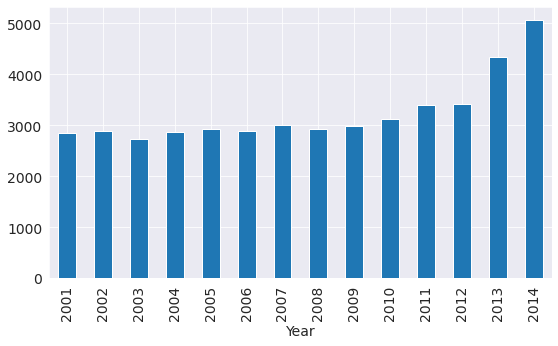

In [ ]:
crimes_df.groupby(by=crimes_df["Year"])["Rape"].max().plot(kind="bar")
plt.show()

2.KIDNAPPING AND ABDUCTION

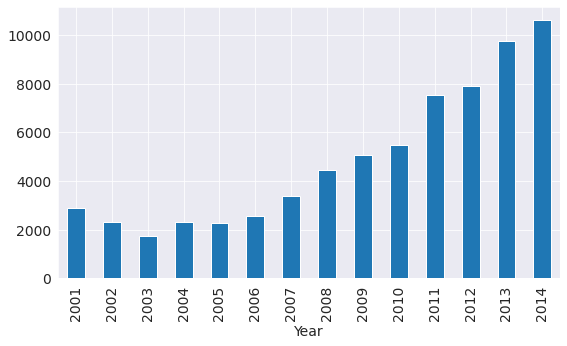

In [ ]:
crimes_df.groupby(by=crimes_df["Year"])["Kidnapping_Abduction"].max().plot(kind="bar")
plt.show()

3.DOWRY DEATHS

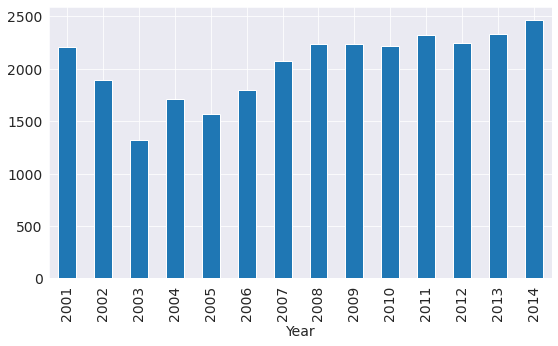

In [ ]:
crimes_df.groupby(by=crimes_df["Year"])["Dowry_Deaths"].max().plot(kind="bar")
plt.show()

4.Hurting of women modesty

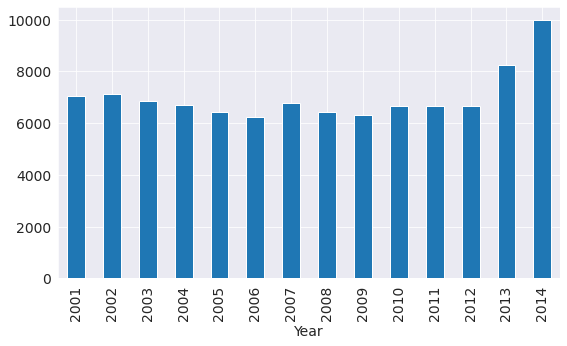

In [ ]:
crimes_df.groupby(by=crimes_df["Year"])["Hurting_of_womens_modesty"].max().plot(kind="bar")
plt.show()

5.INSULT TO WOMENS MODESTY


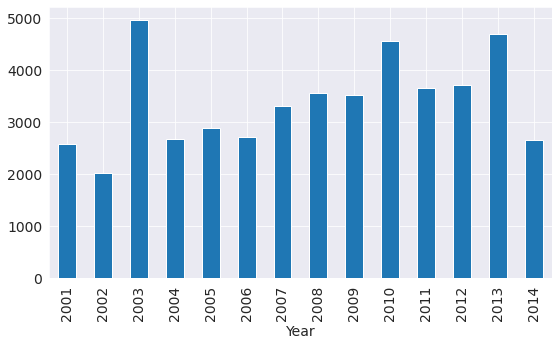

In [ ]:
crimes_df.groupby(by=crimes_df["Year"])["Insult_to_womens_modesty"].max().plot(kind="bar")
plt.show()

6.DOMESTIC CRUELTY

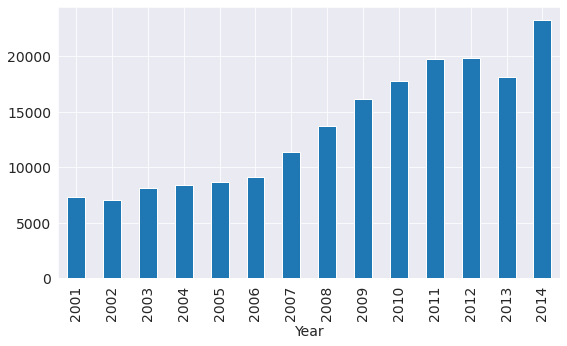

In [ ]:
crimes_df.groupby(by=crimes_df["Year"])["Domestic_Cruelty"].max().plot(kind="bar")
plt.show()

7.IMPORTATION OF GIRLS

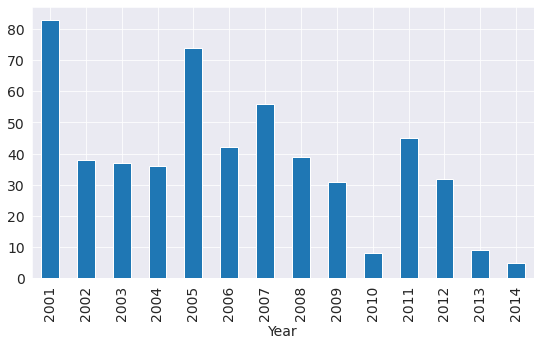

In [ ]:
crimes_df.groupby(by=crimes_df["Year"])["Importation_of_Girls"].max().plot(kind="bar")
plt.show()

There are two things to be concluded from the above bar chart -

1. The cases have incraesed over the years.

2. 2014 has been the year, where violance against women was reported the maximum, under each of the cases like, rape, domestic violence etc, which can also be proved below, which can also be cross examined with the code below.

In [ ]:
count_df = crimes_df.groupby('Year')[['STATE/UT']].count()
count_df

,STATE/UT
Year,
2001,716
2002,719
2003,728
2004,729
2005,733
2006,740
2007,743
2008,761
2009,767


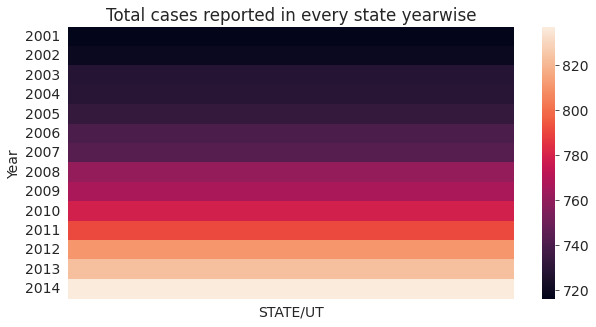

In [ ]:
plt.figure(figsize = (10,5))
plt.title("Total cases reported in every state yearwise")
sns.heatmap(count_df);

This heatmap shows us that every year crime has only increased against women in India.

Total number of cases, in span of 2001-2014 under each category, state wise.

In [ ]:
counts_df = crimes_df.groupby('STATE/UT')[['Rape', 'Kidnapping_Abduction', 'Dowry_Deaths','Domestic_Cruelty', 'Importation_of_Girls','Hurting_of_womens_modesty','Insult_to_womens_modesty']].sum()
counts_df

,Rape,Kidnapping_Abduction,Dowry_Deaths,Domestic_Cruelty,Importation_of_Girls,Hurting_of_womens_modesty,Insult_to_womens_modesty
STATE/UT,,,,,,,
A & N ISLANDS,336,212,20,288,0,600,112
ANDHRA PRADESH,32150,34504,13844,280906,34,126952,86964
ARUNACHAL PRADESH,1316,1470,6,476,0,1996,48
ASSAM,40190,62074,3268,115300,22,38256,254
BIHAR,30758,57086,32206,69770,904,16958,694
CHANDIGARH,770,1682,90,2080,0,1088,342
CHHATTISGARH,29308,11808,2758,23436,12,47096,3968
D & N HAVELI,132,224,2,90,0,106,12
DAMAN & DIU,60,44,6,76,0,40,4


The top 5 states, where maximum numbers of cases has been reported in TOTAL 

In [ ]:
counts_df.sort_values(by = 'Rape', ascending = False).head(5)

,Rape,Kidnapping_Abduction,Dowry_Deaths,Domestic_Cruelty,Importation_of_Girls,Hurting_of_womens_modesty,Insult_to_womens_modesty
STATE/UT,,,,,,,
MADHYA PRADESH,90996,35608,21090,102816,134,195478,20964
UTTAR PRADESH,51150,135906,57256,193738,6,91212,53130
MAHARASHTRA,48974,30368,9696,193202,6,114704,32634
WEST BENGAL,47876,61158,12308,344124,254,66908,5348
RAJASTHAN,45684,66278,11854,262200,14,83362,794


Predictive Analysis

-> ARIMA - Auto Regressive Integrated Moving Average Model

(In progress)